# Robot Learning
## Exercise 1

2025
TAs: Andrea Protopapa (andrea.protopapa@polito.it), Davide Buoso (davide.buoso@polito.it)

# 1. Introduction
Throughout this exercise session, we will take a first look at a Reinforcement Learning environment and its components. In particular, we will deal with the Cart-Pole environment, a classic problem in Reinforcement Learning. Our primary goal is to implement and evaluate various control strategies, including a Linear Quadratic Regulator (LQR) baseline or random policies, to understand their impact on the system's performance and learn about the fundamental concepts of Reinforcement Learning, laying the groundwork for more advanced reinforcement learning techniques in subsequent exercises.

To proceed with the assignment, visit the dedicated starting code at the dedicated webpage and follow the steps listed below in this document. Note: if you haven’t joined the course’s github classroom yet, you will be asked to select your name when you visit it the first time.

As you follow the steps in this document, make sure you’re able to answer all the guiding questions listed at the end of each step.


# 2. Cartpole Gym environment: states, observations

The Cartpole environment consists of a cart and a pole mounted on top of it, as shown in Figure 1. The cart can move either to the left or to the right. The goal is to balance the pole in a vertical position in order to prevent it from falling down. The cart should also stay within a limited distance from the center (trying to move outside screen boundaries is considered a failure).
The observation is a four element vector:





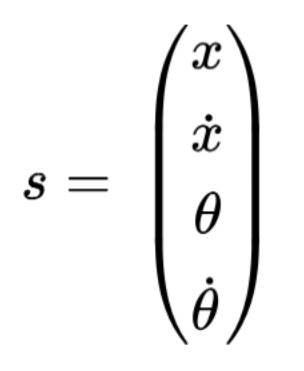

where  is the position of the cart,  is its velocity,  is the angle of the pole w.r.t. the vertical axis, and  is
the angular velocity of the pole.

Gym environment documentation:  https://gymnasium.farama.org/environments/classic_control/cart_pole/


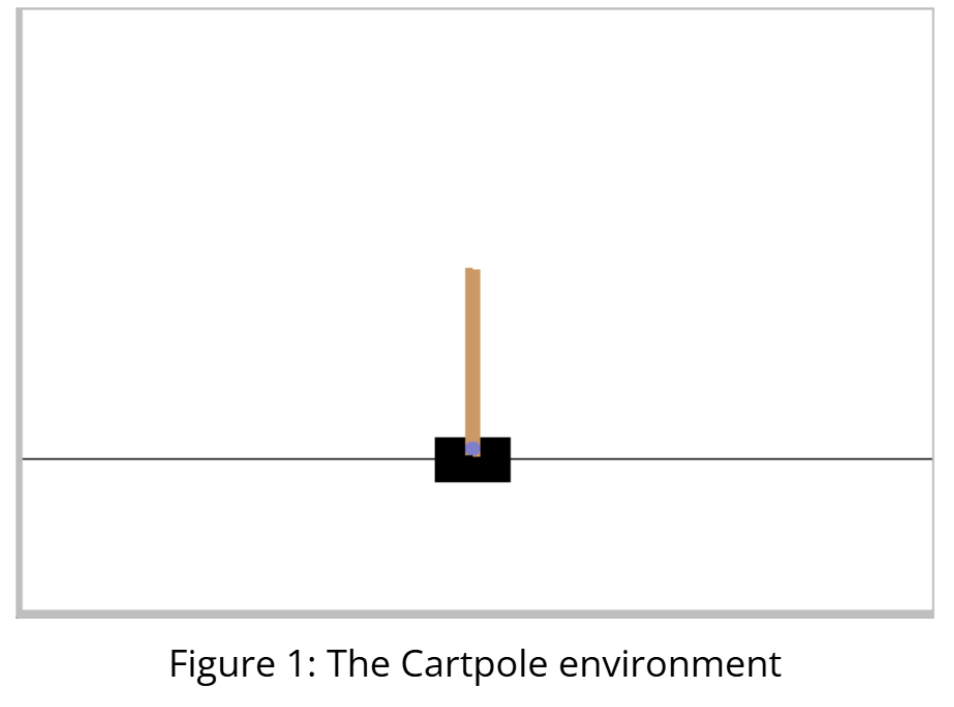

# 3. LQR
For the first assignment, you are tasked with testing a baseline using a Linear Quadratic Regulator (LQR), resulting in an optimal control gain K. The baseline is already implemented in the provided Python script (cartpole_lqr.py). Since the system exhibits nonlinear dynamics, a linear approximation of the system is available through the linearized_cartpole_system(...) function. Given the linear state space representation, the controller K is optimized by minimizing the following cost function:

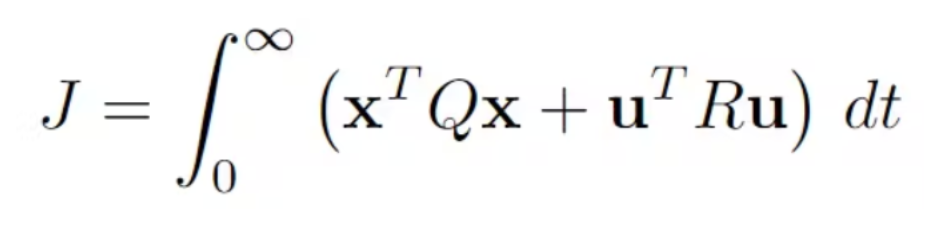

where Q and R are weight matrices carefully chosen and designed. The Q matrix represents the gain of the cost function on the states of the system, while the R matrix represents the gain of the cost function on the input to the system. Therefore, Q and R define what we consider as optimal.



## Task 1
Plot the states of the system (i.e., the elements of the observation vector) over the first 1000 timesteps. Remember that the Cart-Pole task is considered solved by Gym when 499 time steps are reached without the pole falling over.



### Question 1  
Looking at the plot, after which timestep do all states converge to within 0 ± 0.003? Explain what it means for all states to converge to zero from a control standpoint.



### Answer 1:
At around 250 timesteps the four states converge in the 0.003 range. Being in this threshold means the system has reached its equilibrium point - convergence to zero means the LQR controller has successfully accomplished its task: stabilizing the unstable system by balancing the pole and bringing the cart to a stop at its target position. The physical interpretation is quite trivial: the cart is in position 0, still, with the pole in vertical position with no angular speed (as we expect from an equilibrium)

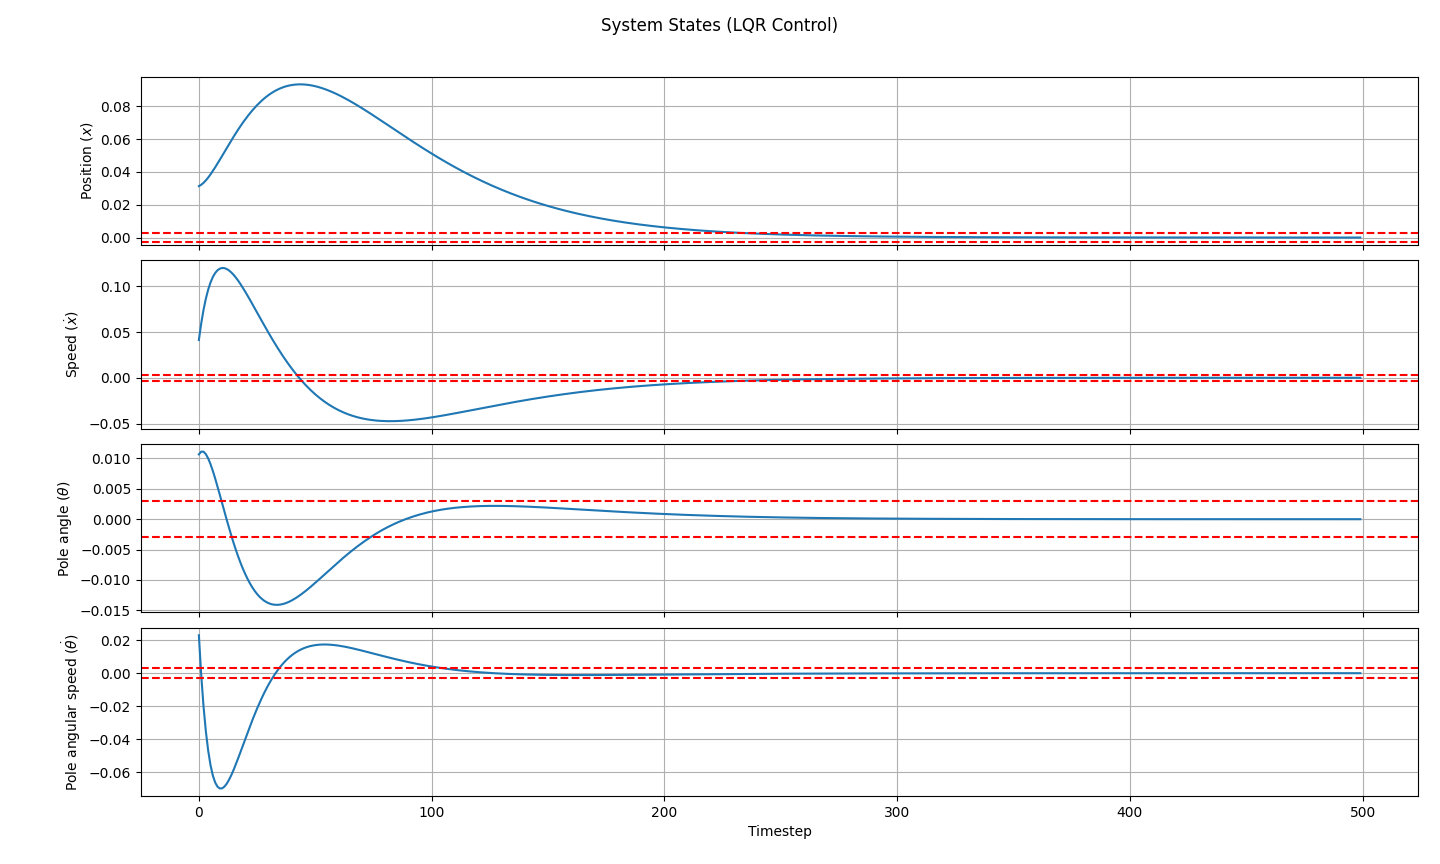

## Task 2:
Vary the value of R within the range [0.01, 0.1, 10, 100] and plot the forces applied to each of the four controlled systems in a single graph over the first 500 timesteps.

*Note 1: for a better visual comparison, invert the single plot for each value of R if the first force applied on the cartpole is positive (e.g., if you are storing all the forces in an array called forces,
this means forces[0]>0). In this way, all the plots would have the same trend*.

Note 2: To ensure the experiments are comparable, you should recreate the environment for each R value. Otherwise, before resetting the environment, reset the seed.

```
		set_seed(args.seed) # seed for reproducibility
		env.env.seed(args.seed)
		# …
		env.reset()
```



### Question 1:
 Analyzing the plot, how does the choice of R affect the force? Are they proportional or inversely proportional?


### Answer 1:
By analizing the plot it's possible to see an inversely proportion betweem R and the magnitude of the force - a smaller R leads to a more "aggressive" approach, with a greater overshoot but faster convergence, a bigger R is more "conservative" -  the convergence is slower but the overshoot is lower. This behaviour is coherent with the definition of cost function J, where R is the parameter that penalizes the control effort, so we can regulate the aggressivenes of the approach by tuning it accordingly to our requirements.

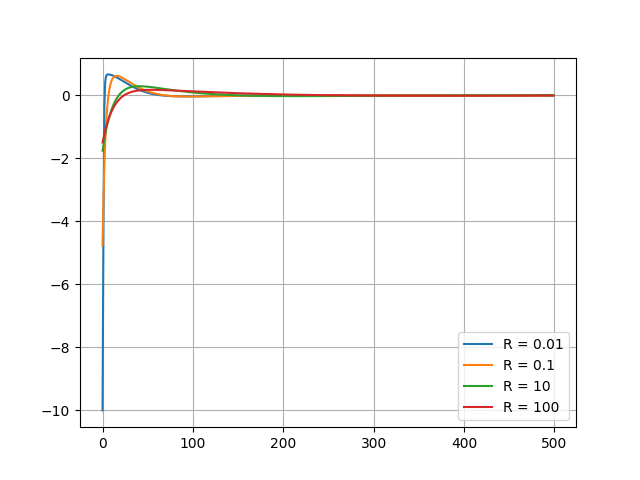

# 4. Reinforcement Learning
The provided Python script (cartpole_rl.py) instantiates a Cartpole environment and a RL agent that acts on it. The agent.py file contains the implementation of a simple reinforcement learning agent; for the sake of this exercise, you can assume it to be a black box (you don’t need to understand how it works, although you are encouraged to study it in more detail). You don’t have to edit that file to complete this exercise session - all changes should be done in cartpole_rl.py.





## 4.1 Training and testing
Run the cartpole_rl.py script. See how it learns to balance the pole after training for some amount of episodes. You can use the --render_training argument to visualize the training (it will run slower when rendering).
When the training is finished, the models are saved to CartPole-v0_params.ai and can be tested by passing --test <path>/<to>/<model>/<file.ai>. You can use the --render_test argument here.

All the training algorithm is encapsulated within the train(...) function. Examine the training loop and answer the following questions:

### Question 1.0.1
What are the conditions under which the episode ends? Do all episodes conclude at the same timestep?


### Answer 1.0.1:
The episodes ends either at the end of simulation or if the agent passes some thresholds (of  pole angle or horizontal position). For this reason the episodes has various final timesteps


### Question 1.0.2
How is the reward internally computed?

*Note: You can refer to the environment's documentation for more details or inspect the code to
determine when different episodes conclude. Rendering the environment may also aid in
understanding episode termination and reward computation.*


### Answer 1.0.2: The agent objective is to maximize the number of timesteps it remains "alive" (so the episode is not terminated as a consequence of surpassing the thresholds). The reward function simply assigns +1 for every timestep

## Task 1.1.
Try to train the agent using a random policy. This entails not considering the predicted actions by the agent at each current timestep. Instead, sample a random action from within the action space, and perform this action on the environment.

### Question 1.1
Evaluate the learned random policy. What is the performance in terms of the average test reward compared to training with the normal policy? Briefly analyze the underlying causes.


### Answer 1.1: Being the action space very limited the results weren't that bad - the result with this random policy were: Average test reward: 9.32 episode length: 9.32
The results with normal policy were: Average test reward: 17.63 episode length: 17.63.

## Task 1.2
Train the agent using the Reinforcement Learning policy with up to 200 timesteps per episode. First, tune the learning rate hyperparameter, as this can have a significant impact on the policy's performance. Try values from the following range:

[1e-5, 1e-4, 1e-3, 1e-2, 1e-1].

### Question 1.2:
Which learning rate value provides the best, most stable performance? Can you explain why?
### Answer 1.2:
The best performing learning rate is probably 1e-2, as it outperforms the previous values but seems more stable compared to 1e-1, that has more variance and a less monotonic-like behaviour. This is because a low learning rate leads to slow policy improvements, that in the 500 episodes can't reach the optimal policy. On the other hand a value like 1e-1 results in an excessively aggressive approach that leads to updates in the policy that "forget" the previous improvements and causes excessive oscillations in the reward function

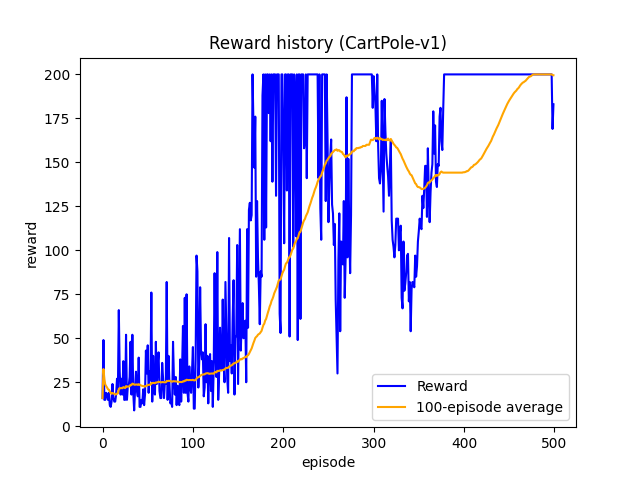

## Task 1.3
Then test the model for 500 timesteps by
changing line n.138 in cartpole_rl.py. You can test the model with:


```
python cartpole_rl.py -t <MODELFILE> --render_test
```

<br>

*Note: the episode length and the number of episodes given by the command line argument
train_episodes are two different things. If you include plots in your submission, use the
train_episodes  as their x-axis.*


### Question 1.3:
Can the same model, trained to balance for 200 timesteps, also balance the pole
for 500 timesteps? Briefly justify your answer.


### Answer 1.3:
In general no, as the model trained for 200 timesteps could leave the system in a state that it cannot handle for other 300 steps - by inspecting the renders the general behaviour was to continuing sliding the cart to the right, so it triggered the max x position threshold. The test results were :Average test reward: 167.04 episode length: 167.04

## Task 1.4:
 Repeat the experiment a few times, each time training the model from scratch with 200
timesteps and testing it for 500 timesteps. Evaluate its performance by using the --render_test argument and remember the average test rewards.


### Question 1.4:
Are the behavior and performance of the trained model the same every time?
Analyze the causes briefly.


### Answer 1.4:
The results varied -
(1) Average test reward: 498.03 episode length: 498.03
(2) Average test reward: 256.27 episode length: 256.27
(3) Average test reward: 194.93 episode length: 194.93
(4) Average test reward: 500.0 episode length: 500.0
(5) Average test reward: 92.53 episode length: 92.53

the 4th iteration also scored max reward in the last 100 episodes - this is due to randomness in the conditions: env.reset() does not generates the same initial state, and also the agent exploration has a random component in sampling the action.

# 4.2 Repeatability

Figure 2 shows the mean and standard deviation throughout 100 independent training procedures. You can notice that there is a large variance between the runs of the script.

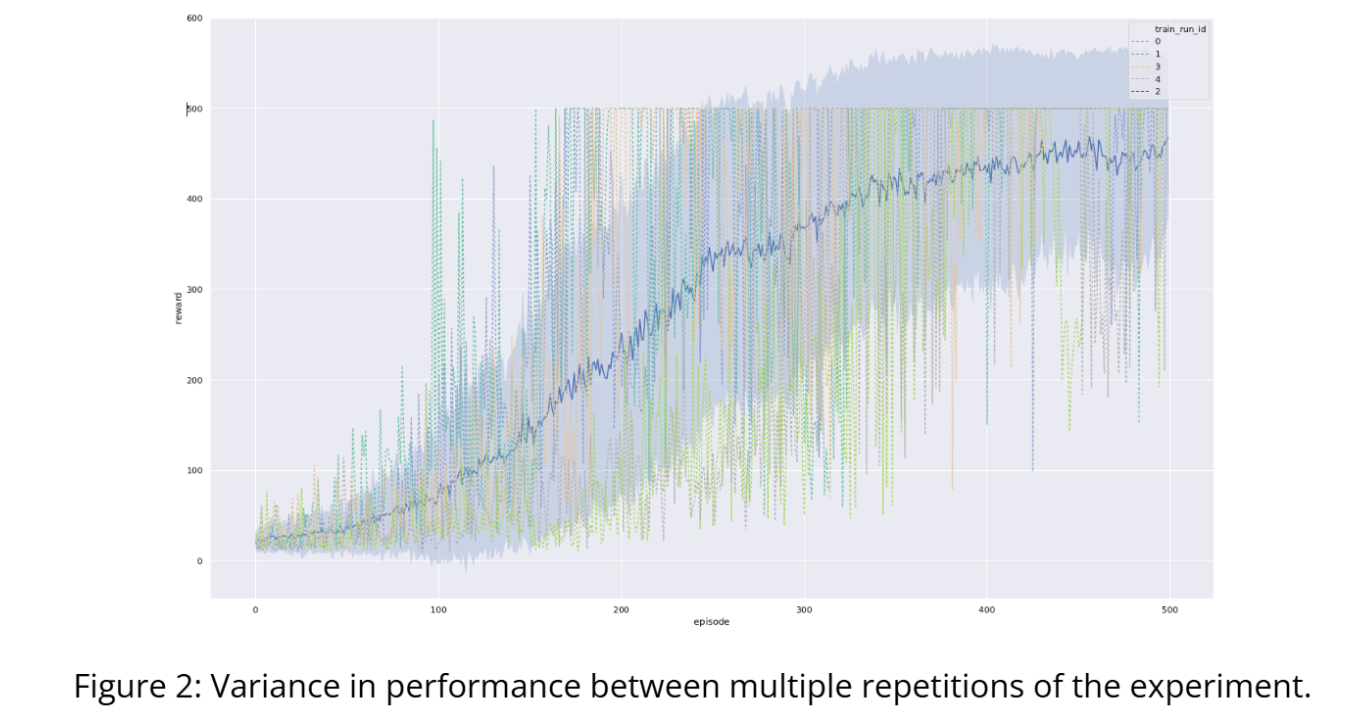

### Question 2:
Why is this the case? What are the implications of this stochasticity, when it comes to comparing reinforcement learning algorithms to each other? Please explain.

*Note: You can generate a similar plot by running the multiple_cartpoles_rl.py script. If the script is slow, try disabling PyTorch multithreading (by running the script with OMP_NUM_THREADS=1)*



### Answer 2:
As previously discussed in answer 1.4, variance is given by the randomness in reinforcement learning process, in this case stochasticity sources are the initial condition and the learning itself - the agent samples from a probability distribution to actively explorate the space. This leads to the invalidation of a comparison of different models on a single run, as one algorithm may appear better than the other simply because it had a “lucky seed” that led to more efficient exploration. So the comparison approach must be over aggregate statistics of the learning curves, like mean for performance evaluation and variance for stability and robustness.

# 4.3 Reward functions:
Let us design a custom reward function and use it instead of the default reward returned by the environment (see the new_reward(...) function for an example).




## Task 3.1
Write different reward functions to incentivise the agent to learn the following behaviors and include them in your report:
1. Balance the pole close to the center of the screen (close to x=0),
2. Balance the pole in an arbitrary point of the screen (x=x0), with x0 passed as a command line argument to the script,
3. Keep the cart moving from the leftmost to rightmost side of the track as fast as possible, while still balancing the pole. The minimum speed of the agent should be high enough that the agent is visibly moving from one side of the other (not just jittering in the center) and changes direction at least once and not just drifting in a random direction.

Train a model with each reward function and include them in your submission.

**Hint**: Use the observation vector to get the quantities required to compute the new reward (such as the
speed and position of the cart). If you feel like your model needs more time to train, you can leave it running for longer with the command line argument --train_episodes number, where number is the amount of episodes the model will be trained for (default is 500).



## Task 3.2
Let us visualize the third reward function. Train the model at least 10 times using
multiple_cartpoles_rl.py (adjust the --num_runs and --train_episodes parameters) and include the performance plots similar to Fig. 2.


### Question 3.2:
Observe the agent using `python cartpole_rl.py -t <MODELFILE> --render_test` and keep track of the observations. What do you observe? What is the highest velocity the agent reaches?



### Answer 3.2

# 5. Extras

### Question 1:
Discuss briefly the advantages of using an LQR controller or an RL agent to solve a general task of controlling a robotic system. Analyze the differences and similarities between the two methods.


### Answer 1:
